# Cost Function 비용함수 그리기

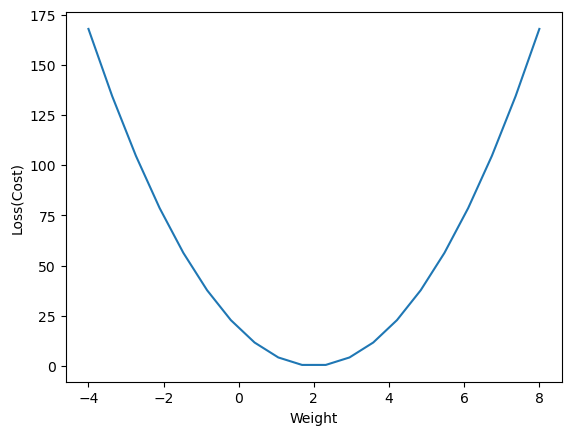

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 단변량 데이터 기준
def MSE(w, x, y, b):
    # MSE는 w가중치, x, y, b편차를 매개변수로 받는다
    s = 0 # 각 사례에 대한 오차의 합을 저장
    for i in range(len(x)):
        s += (y[i] - (w*x[i]+b))**2
        # (정답 - 예측값)의 제곱        
    return s / len(x)

# y = 2x + 0.1 모델 가정
x = [1., 2., 3.] # 입력변수, 독립변수, 특성값, Feature
y = [2.1, 4.1, 6.1] # 종속변수, 정답, Label
b = 0.1


w_val = [ ] # 가중치 목록을 저장 (x축의 값으로 이용)
cost_val = [ ] # 손실값 목록을 저장 (y축의 값으로 이용)

# 가중치의 변화에 따른 손실의 변화를 보는 것이므로 여러 개의 가중치와 손실값을 저장하여 관측하고자 하는 것

for w in np.linspace(-4,8,20): # -4이상 8이하를 20등분
    c = MSE(w, x, y, b)
    w_val.append(w)
    cost_val.append(c)

plt.plot(w_val, cost_val)
# x축은 w_val, y축은 cost_val
plt.xlabel('Weight')
plt.ylabel('Loss(Cost)')

plt.show()

# 손실이 가장 적은 가중치는 2임을 확인할 수 있다

# 가중치 학습
- scikit-learning : 싸이킷 러닝 : 머신러닝 알고리즘 라이브러리
- https://scikit-learn.org
- API : application programming interface : 해당 프로그램 개발사가 미리 만들어서 제공하는 라이브러리
- 개발사(vendor)가 제공하는 API가 풍부할수록 개발자들은 직접 알고리즘 개발 및 구현할 필요가 없으므로 프로그램을 빠르게 만들 수 있으므로 좋다.
- 라이브러리 홈페이지의 API 또는 Document 배너에 들어가서 활용법을 익히면 된다
<pre>
load_diabetes 검색
Dimensionality, 즉 차원이 10개라는 것은 독립변수(x)가 10개라는 의미
Features은 x
Targets은 y
</pre>

In [2]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# 1. 가중치를 구하는 방법 학습시키기 위해 sample 데이터 가져오기

diabetes = load_diabetes() # 당뇨병환자 데이터 로드 # 파이썬의 딕셔너리 형태
# print(diabetes.DESCR)
# Number of Instances: 442 : 전체 데이터 개수는 442개
# Number of Attributes: First 10 columns are numeric predictive values : 독립변수 x는 1~10번째 컬럼 : x가 여러 개인 다변량 데이터이므로 가중치도 여러 개!!
# Target: Column 11 is a quantitative measure of disease progression one year after baseline : 종속변수 y는 11번째 컬럼 : 당뇨병의 진척 정도




# 2. 직접 가중치를 업데이트 해보기

# 독립변수 x
# data : {ndarray, dataframe} of shape (442, 10)
# feature_names: list
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
display(df.head())
# 분석할 때 용이하도록 전처리, 즉 정규화가 되어진 값들
# df.describe()

# 종속변수 y
# target: {ndarray, Series} of shape (442,)
df['target'] = diabetes.target
# df에 종속변수 데이터 Series를 담고있는 target 컬럼을 추가하기
display(df.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


-0.0902752958985185
0.17055522598066


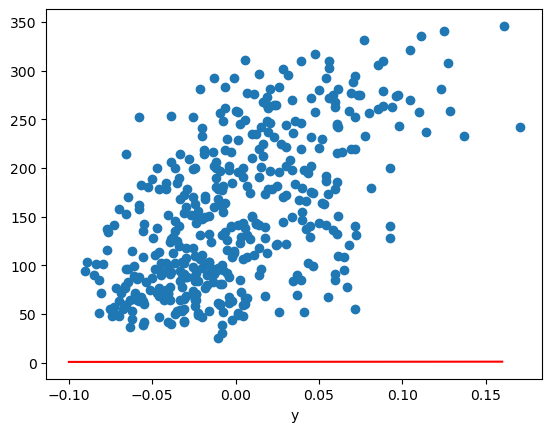

In [18]:
# 3. x값으로 bmi 체질량 지수, y값으로 target 활용하여 회귀선 만들기

# x축의 값으로 사용할 bmi 컬럼의 최대값/최소값 확인
# -> 회귀선의 시작값과 끝값을 정하기 위한 것!!!
print(df['bmi'].min())
print(df['bmi'].max())
# print(np.min(df['bmi']), np.max(df['bmi']))

# 초기 가중치와 절편을 임의로 1.0로 설정
w = 1.0 # 초기 가중치
b = 1.0 # 초기 절편

# bmi 컬럼의 최소 최대값에 맞춰 회귀선의 시작점과 끝점을 지정한 것
pt1 = (-0.1, -0.1*w+b) # 회귀선의 시작점 (x,y)
pt2 = (0.16, 0.16*w+b) # 회귀선의 끝점 (x,y)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r') # 회귀선
# pt1[0] = -0.1 // pt2[0] = 0.16 // pt1[1] = -0.1*w+b // pt2[1] = 0.16*w+b
plt.scatter(df['bmi'], df['target']) # 산점도
plt.xlabel('x')
plt.xlabel('y')

plt.show()

# 체질량 지수에 따른 당뇨병 진척도를 그린 것으로 우상향하는 상관관계가 있음을 알 수 있다.
# 회귀선은 아직 학습이 안된 상태 (w,b에 임의의 값 1.0만 받은 것이므로)라서 안맞는 것
# 회귀선을 업데이트, 즉 학습시켜서 산점도를 꿰뚫는 유의미한 회귀식을 만들어야.

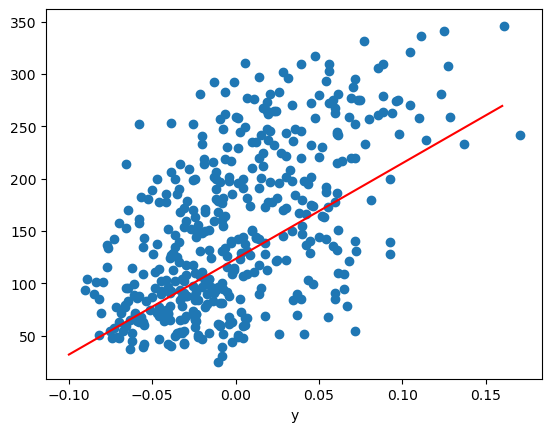

In [19]:
# 4. 회귀선 학습시키기

x = diabetes.data[:, 2] # bmi
y = diabetes.target # target

w = 1.0
b = 1.0

for i in range(100) : # 100번 반복하여 학습
    for x_i, y_i in zip(x,y):
        # x와 y를 동시에 병행해서 순회
        y_hat = w*x_i + b # 예측된 y
        w = w - (y_hat - y_i) * x_i # weight 학습시키기
        b = b - (y_hat - y_i) # b 학습시키기

pt1 = (-0.1, -0.1*w+b) # 회귀선의 시작점 (x,y)
pt2 = (0.16, 0.16*w+b) # 회귀선의 끝점 (x,y)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r') # 회귀선
plt.scatter(df['bmi'], df['target']) # 산점도
plt.xlabel('x')
plt.xlabel('y')

plt.show()
# 학습을 통해 만들어낸 회귀 모델
# 이후에 새로운 bmi 값을 넣으면 회귀 모델에 따른 y 예측값을 얻을 수 

# early stopping : 반복횟수를 천 번으로 지정했으나, 어느 순간 손실이 더 커지는 시점이 생기면 반복을 중단하는 것

# 단변량 데이터의 Linear Regression

## Linear Regression -1

In [4]:
from sklearn.linear_model import LinearRegression
# 가장 대표적인 선형회귀분석에 사용되는 클래스
import numpy as np



# 1. 데이터 준비

# 머신러닝에서는 입력값 하나하나가 스칼라 값이 아닌 벡터의 형태로 들어가야 함
# x가 1차원 백터면 원소가 스칼라로 들어가니까 2차원으로 차원을 늘려줘야 함
# y는 1차원 백터여도 상관없음
x = np.array([1,3,2,4,7,4,9,2,3,2,6,3,2,7])
# print(x.shape) # (14,)
x = np.expand_dims(x, axis=1)
# x = np.reshape(x, (-1,1)) # 위와 동일한 방법
# print(x.shape) # (14, 1) 14행 1열

y = np.array([3,9,6,7,10,6,12,2,4,3,8,5,3,10])



# 2. 모델 준비
model = LinearRegression() # 아직 학습되지 않은 모델


# 3. 모델 학습 (fitting)
# 학습용 데이터와 평가용 데이터를 나누는 것은 생략했습니다 :)
model.fit(x, y) # y = wx + b


# 4. 모델 평가 (evaluating)
# MAE, RMSE, R**2 등 다양한 평가지표를 통해 모델 성능을 평가할 수 있다.
r_square = model.score(x, y) # score : 결정계수 값을 반환시켜주는 함수
# 이때 학습용이 아닌 평가용으로 분리한 데이터를 이용하여 평가해야한다.
print('R square:', r_square) # 0.79 : 준수한 성능을 갖는 모델


# 5. 예측 (predict)
# 3번째 값인 4를 넣었을 때 7이 나오는지 확인해보기
# 단, 2차원의 형태로 넣어야 한다!!
# x[3] # [4] : 1차원
x_temp = np.expand_dims(x[3], axis=1)
y_hat = model.predict(x_temp)
print('예측값:', y_hat)
print('실제값:', y[3])

R square: 0.7890969966117029
예측값: [6.36892278]
실제값: 7


## Linear Regression -2

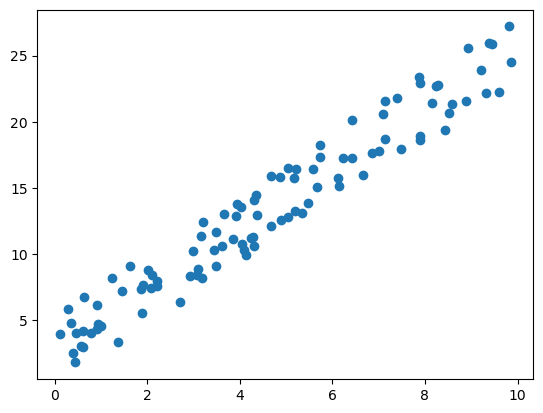

결정계수: 0.94
추정 계수(가중치): [[2.20094514]]
절편: [3.12687114]


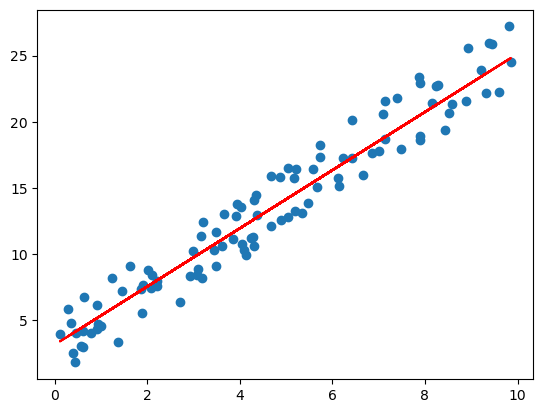

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# 학습 데이터와 테스트 데이터 분류를 용이하게 해주는 것
import numpy as np
import matplotlib.pyplot as plt


# 1. 데이터 준비
x = np.random.rand(100,1) * 10
# 0이상 1미만의 난수 실수 100행 1열의 데이터를 10개 생성
# 이미 2차원 배열이므로 차원 늘려줄 필요 없음
y = (x * 2.3) + np.random.rand(100,1) * 5.4 # 2.3은 w // 5.4는 편향값
plt.plot(x,y,'o')
plt.show()


# 2. 모델 준비
model = LinearRegression() # 아직 학습되지 않은 모델


# 3. 학습 데이터와 평가 데이터 분할
# 분할된 네 개의 값을 동시에 튜플로 반환해준다
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.3,
                                                   # train_size=0.7
                                                   random_state=0)
# 독립변수 x, 종속변수 y
# 분할비율 : train_size & test_size
# seed고정 : random_state


# 4. 모델 학습
model.fit(x_train, y_train) # y = wx + b


# 5. 모델 평가 (evaluating)
r_square = model.score(x_test, y_test)
# score : 결정계수 값을 반환시켜주는 함수
# 이때 학습용이 아닌 평가용으로 분리한 데이터를 이용하여 평가해야한다.
print(f'결정계수: {r_square:.2f}') # 0.79 : 준수한 성능을 갖는 모델
print('추정 계수(가중치):', model.coef_)
print('절편:', model.intercept_) # 편차 : 편향된 값 : 오차의 평균 값..?
# 임의의 가중치 2.3과 유사한 2.28이 나왔다 


# 6. 예측 및 시각화 (predict)
plt.plot(x, y, 'o') # 원본 데이터
plt.plot(x, model.predict(x), 'r') # y: 예측된 y 값
plt.show()
# 유의미한 회귀선임을 알 수 있다.

## [문제] 키와 몸무게 데이터를 학습한 후 키 170인 사람의 몸무게를 예측하는 프로그램을 작성하시오.

키 170인 사람의 예측 몸무게: [56.08811507]
R square: 0.7663442186552938


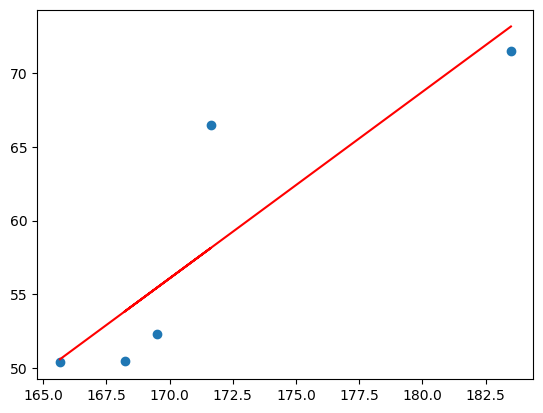

In [80]:
# 1. 데이터 준비
raw_data = {
    'Height' : [165.67, 171.63, 169.5, 168.22, 183.5],
    'Weight' : [50.4, 66.5, 52.3, 50.5, 71.5]
}

x = np.array(raw_data['Height']).reshape(-1,1)
# 딕셔너리 객체에서 특정 키의 벨류들을 가져옴
# x가 1차원 백터면 원소가 스칼라로 들어가니까 2차원으로 차원을 늘려줘야 함
# y는 1차원 백터여도 상관없음
y = np.array(raw_data['Weight'])


# 2. 모델 준비
from sklearn.linear_model import LinearRegression
# 가장 대표적인 선형회귀분석에 사용되는 클래스
import numpy as np
model = LinearRegression() # 아직 학습되지 않은 모델


# 3. 모델 학습 (fitting)
# 학습용 데이터와 평가용 데이터를 나누는 것은 생략했습니다 :)
model.fit(x, y) # y = wx + b


# 4. 예측  (predict)
y_hat = model.predict([[170]])
print('키 170인 사람의 예측 몸무게:', y_hat)


# 5. 모델 평가 (evaluating)
# MAE, RMSE, R**2 등 다양한 평가지표를 통해 모델 성능을 평가할 수 있다.
r_square = model.score(x, y) # score : 결정계수 값을 반환시켜주는 함수
# 이때 학습용이 아닌 평가용으로 분리한 데이터를 이용하여 평가해야한다.
print('R square:', r_square) # 0.79 : 준수한 성능을 갖는 모델


# 6. 시각화 (predict)
plt.plot(x, y, 'o') # 원본 데이터
plt.plot(x, model.predict(x), 'r') # y: 예측된 y 값
plt.show()
# 유의미한 회귀선임을 알 수 있다.

## [문제] 캘리포니아 집값 예측
- 1990년 캘리포니아의 블록 그룹마다의 평균 주택 가격 데이터
    - longitude : 경도
    - latitude : 위도
    - housing_median_age : 블록 내 주택의 연령 중앙값
    - total_rooms : 블록 내 주택의 총 방 개수
    - total_bedrooms : 블록 내 주택의 총 침실 개수
    - population : 블록 내 거주 중인 총 주민 수
    - households : 블록 내 거주 중인 총 가구 수
    - median_income: : 불록 내 가구의 소득 중앙값
    - median_house_value : 불록 내 가구의 주택 매매가 중앙값
- 8개는 독립변수 x / 마지막 9개는 종속변수 y
- 1. 경도와 위도를 제외한 독립변수로 집 값을 예측하기
- 2. 분석용 / 평가용 데이터 나누기
- 3. 예측시 평가 데이터 내의 임의의 데이터를 하나 가져와서 주택 가격 예측하기
- 4. 실제 주택가격과 예측 주택가격을 비교

In [2]:
import numpy as np
import pandas as pd

housing_train = pd.read_csv('california_housing_train.csv')
housing_train.head()

housing_test = pd.read_csv('california_housing_test.csv')
housing_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


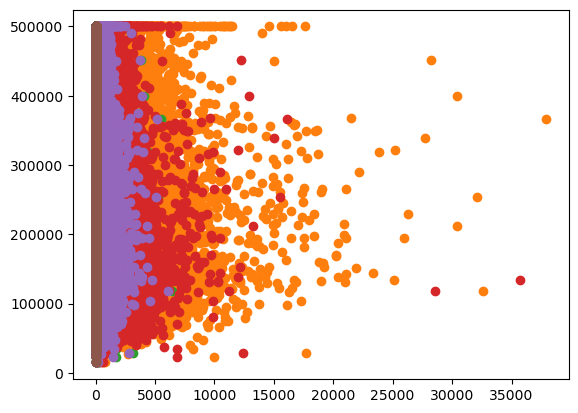

결정계수: 0.55
추정 계수(가중치): [ 1.88001408e+03 -1.99559207e+01  9.95247716e+01 -3.50182347e+01
  1.27225320e+02  4.80334593e+04]
절편: -47624.11171942926
예측값: [152928.96574902]
실제값: 166900.0


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. 학습용 데이터 준비
x_train = housing_train.iloc[:, 2:8]
# 이미 2차원 배열이므로 차원 늘려줄 필요 없음
y_train = housing_train.iloc[:, 8]
plt.plot(x_train,y_train,'o')
plt.show()

# 2. 모델 준비
model = LinearRegression() # 아직 학습되지 않은 모델

# 3. 모델 학습
model.fit(x_train, y_train) # y = wx + b


# 4. 평가용 데이터 준비
x_test = housing_test.iloc[:, 2:8]
y_test = housing_test.iloc[:, 8]

# 5. 모델 평가 (evaluating)
r_square = model.score(x_test, y_test)
# score : 결정계수 값을 반환시켜주는 함수
# 이때 학습용이 아닌 평가용으로 분리한 데이터를 이용하여 평가해야한다.
print(f'결정계수: {r_square:.2f}')
print('추정 계수(가중치):', model.coef_)
print('절편:', model.intercept_) # 편차 : 편향된 값 : 오차의 평균 값..?


# 6. 예측 및 시각화 (predict)
x_temp1 = x_test.iloc[7,:] # Series 출력
x_temp2 = x_temp1.values.reshape(1,-1) # 값만 2차원으로
y_hat = model.predict(x_temp2)
print('예측값:', y_hat)

print('실제값:', y_test[7])

R스퀘어:  0.6412425742833762
예측값: [133833.]
실제값: 125000.0


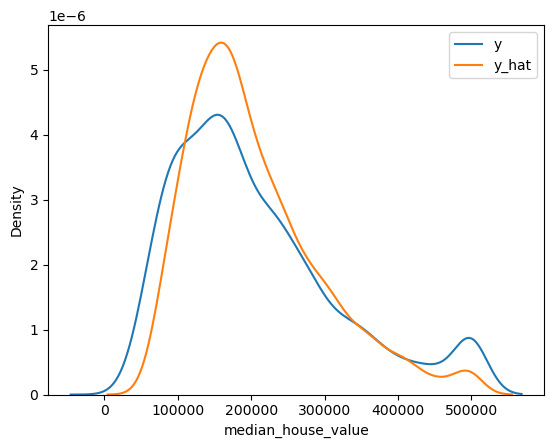

In [46]:
# A.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# 선형회귀분석방법 중 앙상블기법
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('california_housing_train.csv')
# test_data.head()
x_train = train_data.drop(['longitude', 'latitude', 'median_house_value'], axis=1)
# 1,2행을 드랍시키거나, 나머지행을 슬라이싱 추출하거나
y_train = train_data['median_house_value']

# model = LinearRegression() # 모델 생성
model = RandomForestRegressor(random_state=0) # 앙상블 기법으로 모델 생성
model.fit(x_train, y_train) # 모델 학습

test_data = pd.read_csv('california_housing_test.csv')
# test_data.head()
x_test = test_data[test_data.columns[2:8]]
y_test = test_data['median_house_value']

r_square = model.score(x_test, y_test)
print('R스퀘어: ', r_square)
# 앙상블 기법 : 의사결정나무 수백 개를 만들어내고 다수결의 원칙에 따라 (집단지성을 이용하는 것과 같은 의미) 임의로 나무 한 개를 채택
# 트리의 개수와 로직 개수가 랜덤해서 돌아가므로 매번 결과가 다름

predict_data = x_test[10:11] # x_test[7]은 7열을 의미하므로 NO
y_hat = model.predict(predict_data)
print('예측값:', y_hat)
print('실제값:', y_test[10])

# 평균 오차인 MAE 구하는 법은 나중에 배울 예정 

# 일치 확률을 시각화하고 싶다면?
y_hat = model.predict(x_test)
# 하나의 plot에 두 개의 분포 그래프 그리기 (ax=ax1)
ax1 = sns.kdeplot(y_test, label='y') # b: 실제 정답에 대한 집값 분포 그래프
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1) # o: 예측값에 대한 분포 그래프
plt.legend()
plt.show()

# 다변량 데이터의 Linear Regression

# 데이터 전처리
- 원핫인코딩시 pandas가 낫다
- 라벨링시 scikit-learn가 낫다

## one-hot encoding

### scikit-learn의 OneHotEncoder
- 입력값으로 2차원 데이터가 필요하다
- 원핫 인코딩의 결과는 밀집행렬(Dense Matrix)이므로 희소행렬(Parse Matrix)로 변환해야 한다.
- 밀집행렬 : 1의 index만 벡터로 반환한 것

In [53]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# 범주형 데이터
maker = ['Samsung', 'LG', 'Apple', 'SK']
maker = np.array(maker).reshape(-1,1) # 2차원 데이터로 만들어주기

encoder = OneHotEncoder()
# fit : 전처리 대상 데이터의 기본 정보를 수집하고, 그것을 읽어와서 전처리를 위한 환경을 만들어주는 것
# transform : 실제로 변환하는 것
encoder.fit(maker)
one_hot = encoder.transform(maker)

print('원-핫 인코딩 결과 (밀집행렬)')
print(one_hot)
print()
print('원-핫 인코딩 결과 (희소행렬)')
print(one_hot.toarray()) # 바이너리 벡터로 변환하는 것

원-핫 인코딩 결과 (밀집행렬)
  (0, 3)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 2)	1.0

원-핫 인코딩 결과 (희소행렬)
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


### pandas의 get_dummies()

In [54]:
import pandas as pd

df = pd.DataFrame({'maker' : ['Samsung', 'LG', 'Apple', 'SK']})
pd.get_dummies(df)

,maker_Apple,maker_LG,maker_SK,maker_Samsung
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,0,1,0


## Label encoding

### scikit-learn의 LabelEncoder

In [58]:
from sklearn.preprocessing import LabelEncoder

language = ['Java', 'Python', 'C#', 'Pascal']

encoder = LabelEncoder()
encoder.fit(language)
labels = encoder.transform(language)

print('라벨 인코딩 결과')
print(labels)

라벨 인코딩 결과
[1 3 0 2]


### pandas의 map()
- pd.컬럼명.map(딕셔너리 객체)

In [59]:
df = pd.DataFrame({'language' : ['Java', 'Python', 'C#', 'Pascal']})
map_data = {'Java':0, 'Python':1, 'C#':2, 'Pascal':3}
df['language'] = df['language'].map(map_data)
df

,language
0,0
1,1
2,2
3,3


## Scaling 스케일링

In [1]:
# 이상치가 많은 데이터의 경우, 정규화보다는 표준화가 더 낫다

### 표준화(Standardization)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
# 붓꽃 데이터 : 3가지 품종 (꽃잎과 꽃받침의 길이와 넓이, 네 가지 기준으로 분류)
import pandas as pd

iris = load_iris()
# 데이터를 동적으로 다운로드 # 파이썬의 딕셔너리와 유사한 bunch 객체
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
# iris.feature_names : 샘플 데이터의 독립변수 값을 불러오는 키
iris_df.head()
# sepal : 꽃받침 // petal : 꽃잎

print('컬럼 평균')
print(iris_df.mean())

print('컬럼 분산')
print(iris_df.var())

컬럼 평균
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
컬럼 분산
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [8]:
scaler = StandardScaler()
scaler.fit(iris_df)
# fit : 시리즈와 데이터프레임 객체 모두 넣을 수 있으며 values를 np.ndarray 객체로 가져와서 처리한다.
iris_scaled = scaler.transform(iris_df)

iris_scaled_df = pd.DataFrame(iris_scaled, columns=iris.feature_names)
iris_scaled_df.head()
# 표준화된 데이터 출력

print('표준화된 컬럼 평균')
print(iris_scaled_df.mean())

print('표준화된 컬럼 분산')
print(iris_scaled_df.var())

표준화된 컬럼 평균
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
표준화된 컬럼 분산
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### 정규화(Normalization)

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_scaled_df = pd.DataFrame(iris_scaled, columns=iris.feature_names)
iris_scaled_df.head()
# 정규화된 데이터 출력

print('정규화된 컬럼 최대값')
print(iris_scaled_df.max())

print('정규화된 컬럼 최소값')
print(iris_scaled_df.min())

print('정규화된 컬럼 평균')
print(iris_scaled_df.mean())

print('정규화된 컬럼 분산')
print(iris_scaled_df.var())

정규화된 컬럼 최대값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64
정규화된 컬럼 최소값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
정규화된 컬럼 평균
sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64
정규화된 컬럼 분산
sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64
